# Recurrent Neural Network for song lyric generation 

These sources, along with the Keras documentation were used to develop this notebook:
https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_10_3_text_generation.ipynb#scrollTo=WQQhz_Day39T

https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/

In [ ]:
#import necessary packages
import tensorflow as tf
from tensorflow import keras

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.callbacks import LambdaCallback
import re
import sys
import random

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
  # import data, data must be placed properly for this to work
  f = open("train.txt", "r")
  text = f.read()
  f.close()

In [ ]:
# convert the text to lowercase and remove non ASCII characters
text = text.lower()
text = re.sub(r'[^\x00-\x7f]',r'', text) 

chars = sorted(list(set(text)))
n_chars = len(text)
n_vocab = len(chars)

# print the length of the text
print('corpus length:', len(text))

#print the amount of unique characters in the set
chars = sorted(list(set(text)))
print('total chars:', n_vocab)

#map the characters to integers and map the integers to the characters
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# prepare the dataset of input to output pairs encoded as integers
seq_length = 10
dataX = []
dataY = []
step = 3
for i in range(0, len(text) - seq_length, step):
    dataX.append(text[i: i + seq_length])
    dataY.append(text[i + seq_length])
print('Total Pattern', len(dataX))

#vectorization
x = np.zeros((len(dataX), seq_length, len(chars)), dtype=np.bool)
y = np.zeros((len(dataX), len(chars)), dtype=np.bool)
for i, sentence in enumerate(dataX):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[dataY[i]]] = 1


corpus length: 137149
total chars: 54
Total Pattern 45713


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
# build the model: a single LSTM
print('Build model...')
model = Sequential()
model.add(LSTM(128, input_shape=(seq_length, len(chars))))
model.add(Dense(len(chars), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
print("Model built")
model.summary()

Build model...
Model built
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               93696     
                                                                 
 dense (Dense)               (None, 54)                6966      
                                                                 
Total params: 100,662
Trainable params: 100,662
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#define a list to store the generated text
generated_lyrics = []
Loss = []
Epochs = []

def sample(preds):
    # helper function to sample an index from a probability array, works like softmax
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / 1.0
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

# add class to print text as its generated and print loss/epochs at end
class call_back(keras.callbacks.Callback):
  def __init__(self):
      super(call_back, self).__init__()

  def on_epoch_end(self, epoch, logs=None):
      # Function invoked at end of each epoch. Prints generated text.
      print("******************************************************")
      print('----- Generating text after Epoch: %d' % epoch)
      Loss.append(logs.get("loss"))
      Epochs.append(epoch)
      start_index = random.randint(0, len(text) - seq_length - 1)
      generated = ''
      sentence = text[start_index: start_index + seq_length]
      generated += sentence
      print('----- Generating with seed: "' + sentence + '"')
      sys.stdout.write(generated)

      for i in range(400):
          x_pred = np.zeros((1, seq_length, len(chars)))
          for t, char in enumerate(sentence):
              x_pred[0, t, char_indices[char]] = 1.

          preds = model.predict(x_pred, verbose=0)[0]
          next_index = sample(preds)
          next_char = indices_char[next_index]

          generated += next_char
          sentence = sentence[1:] + next_char
          sys.stdout.write(next_char)
          sys.stdout.flush()
      print()
      plt.ylabel("Loss")
      plt.xlabel("Epochs")
      plt.title("Loss Over Epochs")
      plt.tight_layout()
      plt.plot(Epochs, Loss);
      generated_lyrics.append(generated)

Epoch 1/40
357/358 [============================>.] - ETA: 0s - loss: 2.9679******************************************************
----- Generating text after Epoch: 0
----- Generating with seed: "ting in an"
ting in anem tapa rest iki tk e, tar
t ahonci niinepvo
ua
ie l to i wrpr
tt mut
th
hoam n 'at ' alme no' mn  ynba stalsgioe mtoslis upl ibtrw
thrit thp
ta ouud
garl tigbe, yot sescytale iny the sta rine iteadan igoyd nhs  lees obel tinns tyou pgt enyi 
 aeer  elnre tyt
io
h mne yrie nle 'oy bo
a ig rlgp fulvl maeubity lone tho
ek oo t ak "pay  rtih, biu t wtek c a?yto ple, kwaithg  kku ns apsoge bee
vtiseka
358/358 [==============================] - 23s 50ms/step - loss: 2.9678
Epoch 2/40
355/358 [============================>.] - ETA: 0s - loss: 2.5342******************************************************
----- Generating text after Epoch: 1
----- Generating with seed: "d will be "
d will be arpesorores, jucinpd goulmay le baug hoo'tg
dran
heet thant nod puole (ne whduuu
et hoe g

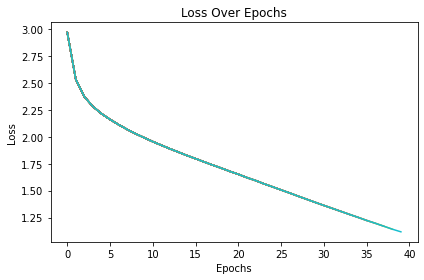

In [ ]:
#fit the model
model.fit(x, y, epochs=40, batch_size=128, callbacks=call_back())

In [ ]:
with open('Baseline_RNN.txt', 'w') as f:
    for item in generated_lyrics:
        f.write("%s\n" % item)
f.close()

In [ ]:
!pip install fast_bleu

  Created wheel for fast-bleu: filename=fast_bleu-0.0.90-cp37-cp37m-linux_x86_64.whl size=581407 sha256=179e4a356aef726850fac1fb0b4156b0ac0cbb5c26fe5b84c2e32a101f2251b6
  Stored in directory: /root/.cache/pip/wheels/bb/68/af/8d3adf7eca3609c20e9c59b27187deb5e7134b52c9df2233d0
Successfully built fast-bleu


In [ ]:
# establish reference corpus
ref_corpus = []
with open('250_lyrics_train.txt') as ref_file:
    ref_lines = ref_file.readlines()
    for i in ref_lines:
      ref_corpus.append(i)

In [ ]:
from fast_bleu import BLEU, SelfBLEU

list_of_references = ref_corpus
hypotheses = generated_lyrics

weight = [0] * 4
weights = {}
for n_gram in range(1,5):
    weight[n_gram - 1] = 1.0
    weights['bleu-{}'.format(n_gram)] = tuple(weight)
    weight[n_gram - 1] = 0.0
    avg_weight = [1. / n_gram] * n_gram
    avg_weight.extend([0. for index in range(4 - n_gram)])
    weights['bleu-{}-avg'.format(n_gram)] = tuple(avg_weight)

bleu = BLEU(list_of_references, weights)
results = bleu.get_score(hypotheses)

bleu_dict = {}
for n_gram in range(1,5):
    bleu_dict['bleu-{}'.format(n_gram)] = []
for n_gram in range(1,5):
    bleu_dict['bleu-{}'.format(n_gram)].append(np.array(results['bleu-{}'.format(n_gram)]).mean())
print(bleu_dict)

{'bleu-1': [0.9422502949423244], 'bleu-2': [0.9148696450239427], 'bleu-3': [0.8247682843111722], 'bleu-4': [0.6155067780696886]}
